# Prueba 
## Edison Huiñaizaca
## Plateacion
Predicción de "género" mediante el valor de "Compra" y el tipo de "Ocupación", para descargar los datos del siguiente link: https://www.kaggle.com/alllexander/blackfriday

## Desarrollo

In [16]:


import pandas as pd
df = pd.read_csv('BlackFriday.csv')



In [17]:
pd = df.iloc[:, [1, 2, 4]]
pd=pd.drop_duplicates()
pd

Product_ID Gender  Occupation
0       P00069042      F          10
1       P00248942      F          10
2       P00087842      F          10
3       P00085442      F          10
4       P00285442      M          16
...           ...    ...         ...
537503  P00021942      M          19
537505  P00057242      M          19
537506  P00147842      M          19
537507  P00016342      M          19
537531  P00216242      M          14

[82484 rows x 3 columns]

## Gardado delos datos depurados

In [5]:
print (pd.transpose())

               0          1          2          3          4          5       \
Product_ID  P00069042  P00248942  P00087842  P00085442  P00285442  P00193542   
Gender              F          F          F          F          M          M   
Occupation         10         10         10         10         16         15   

               6          7         8          9       ...     537443  \
Product_ID  P00184942  P00346142  P0097242  P00274942  ...  P00151042   
Gender              M          M         M          M  ...          M   
Occupation          7          7         7         20  ...          5   

               537462     537466     537484    537495     537503     537505  \
Product_ID  P00069042  P00024342  P00043642  P0096742  P00021942  P00057242   
Gender              F          F          M         M          M          M   
Occupation         16         16         19        19         19         19   

               537506     537507     537531  
Product_ID  P00147842  

In [18]:
 #df = pandas.DataFrame(frame_data)

pd.to_excel("datosExcel.xlsx", "Sheet1")

## Cargado delos datos depurados
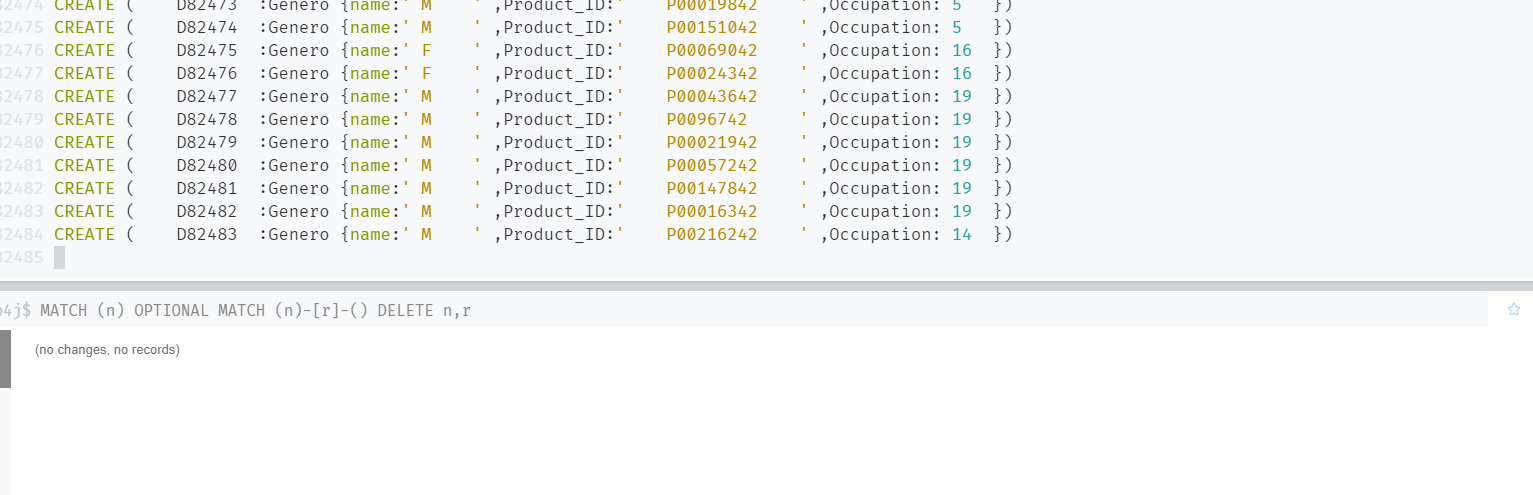
## Comprobacion de la formula KNN desde NEOJ4

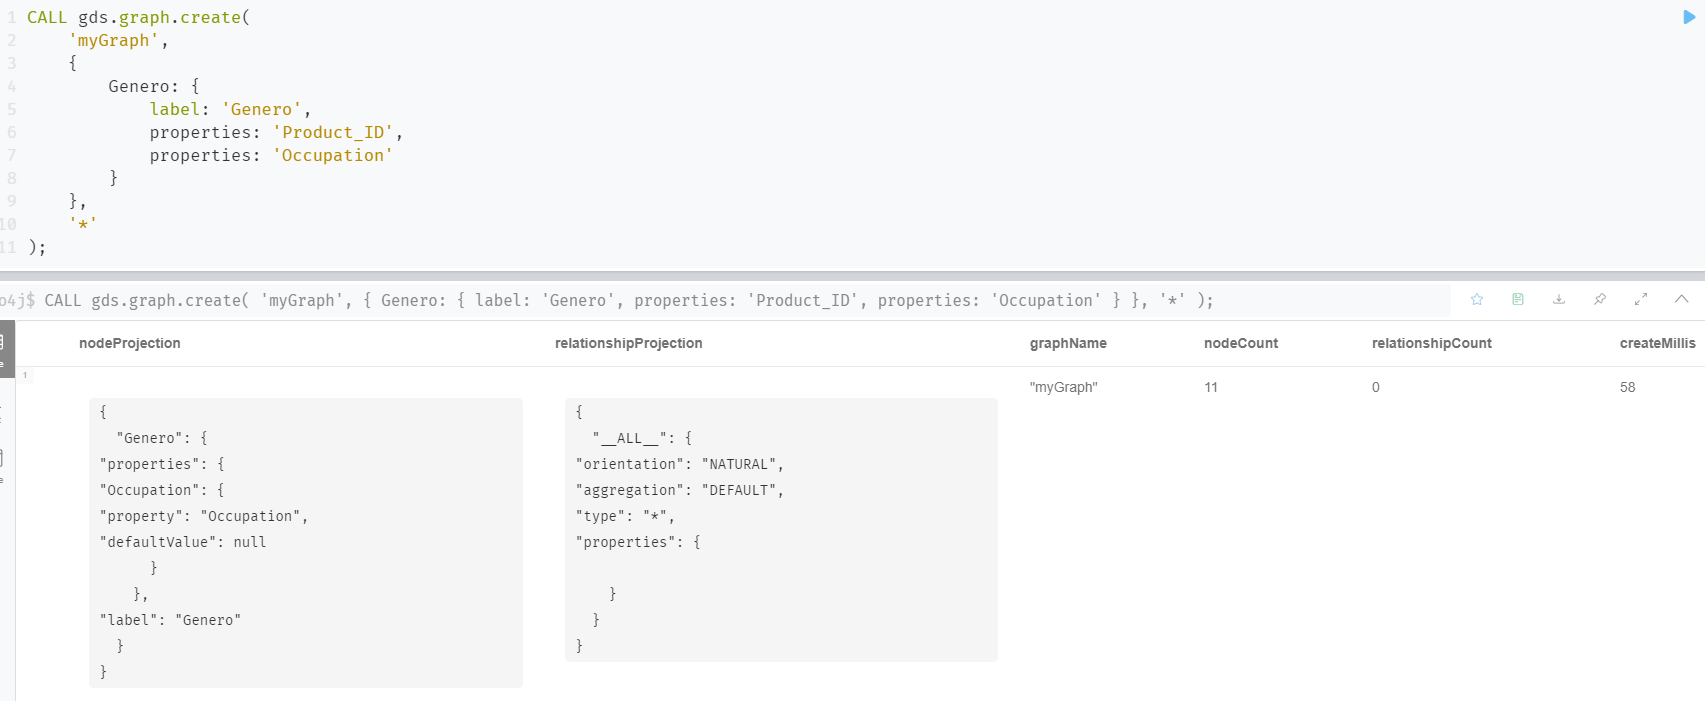

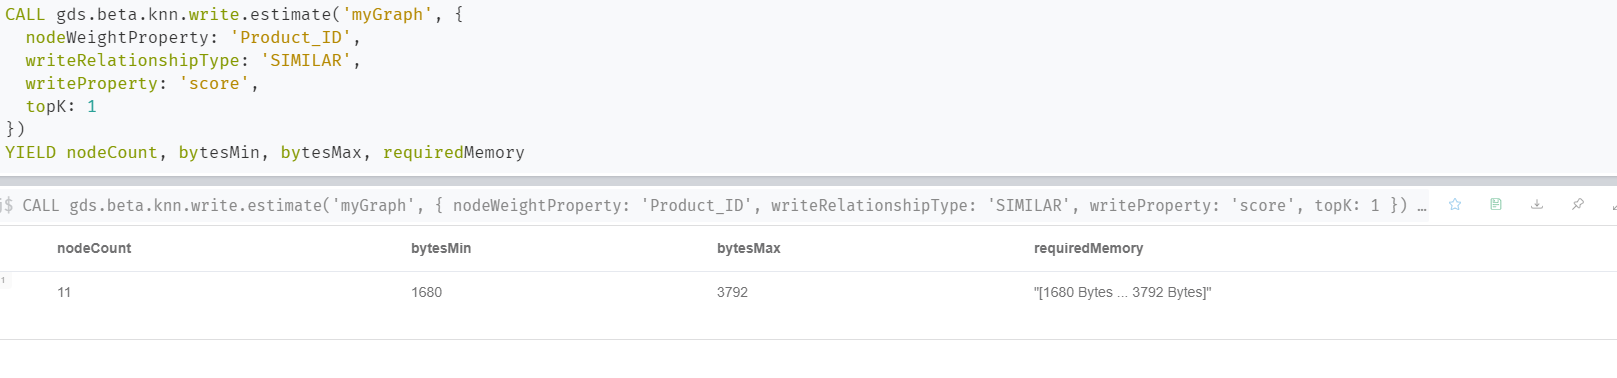

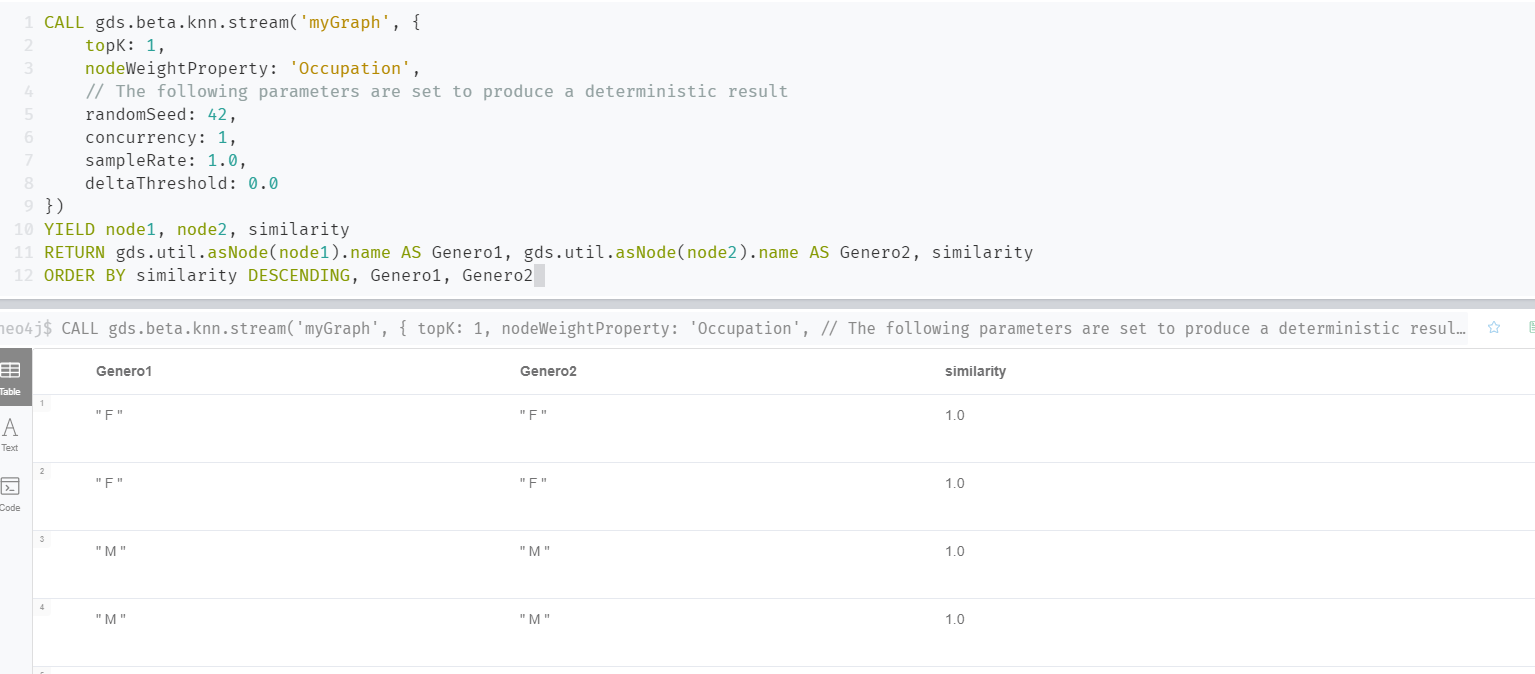

## Aplicacion de la farmula en NEOJ4  de los datos depurados Desde Python

En esta seccion calcularemos el costo de ejecutar del algoritmo. Esto se puede hacer con cualquier modo de ejecución. Usaremos el nodo en este ejemplo. Y se estimo que el algoritmo es útil para comprender el impacto en la memoria que tendrá la ejecución del algoritmo en el gráfico.el sistema realizo una estimación. Si la estimación muestra que hay una probabilidad muy alta de que la ejecución supere sus limitaciones de memoria, la ejecución está prohibida. 

In [19]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


def get_friends_of(tx):
    friends = []
        
    result = tx.run("CALL gds.beta.knn.write.estimate('myGraph', {nodeWeightProperty: 'Product_ID',writeRelationshipType: 'SIMILAR',writeProperty: 'score',topK: 1})"
                            "YIELD nodeCount, bytesMin, bytesMax, requiredMemory")
    for record in result:
        friends.append(record['nodeCount'])
        friends.append(record['bytesMin'])
        friends.append(record['bytesMax'])
        friends.append(record['requiredMemory'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of)
    for friend in friends:
        print(friend)

driver.close()

82336
6258360
22066872
[6111 KiB ... 21 MiB]


En  Esta seccion el algoritmo devuelve una sola fila que contiene un resumen del resultado del algoritmo. El resultado del resumen contiene el coeficiente de agrupación en clústeres avearage del gráfico, que es la suma normalizada sobre todos los coeficientes de clustering locales. Este modo de ejecución no tiene efectos secundarios. Puede ser útil para evaluar el rendimiento del algoritmo inspeccionando el elemento devuelto.

In [11]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


def get_friends_of(tx):
    friends = []
        
    result = tx.run("CALL gds.beta.knn.stats('myGraph', {topK: 1, randomSeed: 42, nodeWeightProperty: 'Occupation'})"
                        "YIELD nodesCompared, similarityPairs")
    for record in result:
        friends.append(record['nodesCompared'])
        friends.append(record['similarityPairs'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of)
    for friend in friends:
        print(friend)

driver.close()

82336
82336


En esta seccion se aplica el algoritmo y devuelve la puntuación de similitud para cada relación. Esto nos permite inspeccionar los resultados directamente o post-proceso en Cypher sin efectos secundarios. Por ejemplo, podemos ordenar los resultados para encontrar los nodos con el coeficiente de agrupación en clústeres local más alto.

In [14]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri,auth=("neo4j", "cuenca"),encrypted=False )


def get_friends_of(tx):
    friends = []
        
    result = tx.run("CALL gds.beta.knn.stream('myGraph', {topK: 1,nodeWeightProperty: 'Occupation',randomSeed: 42,concurrency: 1,sampleRate: 1.0,deltaThreshold: 0.0 })"
                        "YIELD node1, node2, similarity RETURN gds.util.asNode(node1).name AS Genero1, gds.util.asNode(node2).name AS Genero2, similarity ORDER BY similarity DESCENDING, Genero1, Genero2")
    for record in result:
        friends.append(record['Genero1'])
        friends.append(record['Genero2'])
        friends.append(record['similarity'])
    return friends

with driver.session() as session:
    friends = session.read_transaction(get_friends_of)
    for friend in friends:
        print(friend)

driver.close()

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F

	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1

1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F

	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	F	 
1.0
	F	 
	

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	

1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F

	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1

	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	F	 
	M	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1

1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M

	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	F	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M

	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1

	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	M	 
	M	 
1.0
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	F	 
0.5
	F	 
	M	 
0.5
	F	 
	M	 
0.5
	F	 
	M	 
0.5
	F	 
	M	 
0.5
	F	 
	M	 
0

## Conclisiones
Sepuede concluir que ahy una gran relacion de el genero respecto al Ocupacion y el producto
## Bibliografia
https://neo4j.com/docs/graph-data-science/current/algorithms/knn/